In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st
from scipy.stats import sem
from numpy import median
from numpy import arange

mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

mouse_df = pd.read_csv(mouse_metadata)
study_df = pd.read_csv(study_results)

In [2]:
combined_df = study_df.merge(mouse_df, on="Mouse ID", how="outer")
combined_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
summary_stats_df = combined_df.groupby("Drug Regimen")
descriptive_stats_df = summary_stats_df['Tumor Volume (mm3)'].describe()
sem_df = combined_df.groupby("Drug Regimen").sem()
descriptive_stats_df['SEM'] = sem_df['Tumor Volume (mm3)']
descriptive_stats_df['Variance'] = (descriptive_stats_df['std'])**2
median_df = combined_df.groupby("Drug Regimen").median()
descriptive_stats_df["Median"] = median_df['Tumor Volume (mm3)']
descriptive_stats_df = descriptive_stats_df.drop(['count', 'min', '25%', '50%', '75%', 'max'], axis=1)
descriptive_stats_df


,mean,std,SEM,Variance,Median
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,0.329346,24.947764,41.557809
Ceftamin,52.591172,6.268188,0.469821,39.290177,51.776157
Infubinol,52.884795,6.567243,0.492236,43.128684,51.820584
Ketapril,55.235638,8.279709,0.603860,68.553577,53.698743
Naftisol,54.331565,8.134708,0.596466,66.173479,52.509285
Placebo,54.033581,7.821003,0.581331,61.168083,52.288934
Propriva,52.393463,6.568014,0.525862,43.138803,50.909965
Ramicane,40.216745,4.846308,0.320955,23.486704,40.673236
Stelasyn,54.233149,7.710419,0.573111,59.450562,52.431737


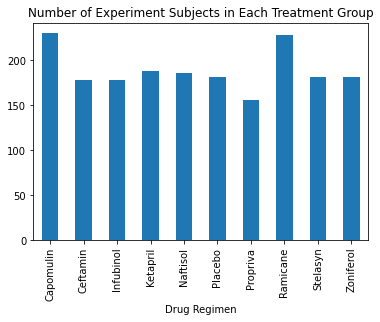

In [69]:
timepoint_count_df = combined_df.groupby("Drug Regimen").count()
timepoint_count_df['Mouse ID'].plot(kind='bar', title='Number of Experiment Subjects in Each Treatment Group')

Text(0, 0.5, 'Participant Group')

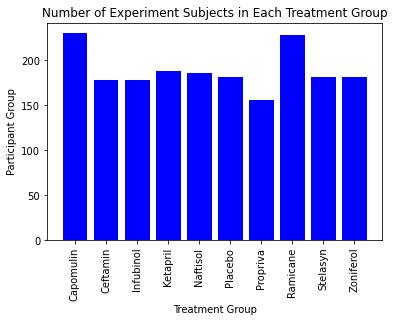

In [67]:
x_axis = arange(len(timepoint_count_df['Mouse ID']))
plt.bar(x_axis, timepoint_count_df['Mouse ID'], color='b', align='center')
indexes = timepoint_count_df.index
indexes = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.xticks(x_axis, indexes, rotation='vertical')
plt.title('Number of Experiment Subjects in Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Participant Group')

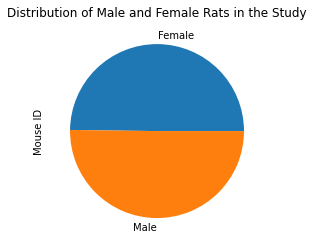

In [68]:
sex_df = combined_df.groupby('Sex').nunique(1)
sex_df
sex_df['Mouse ID'].plot(kind='pie', title="Distribution of Male and Female Rats in the Study")


Text(0.5, 1.0, 'Distribution of Male and Female Rats in the Study')

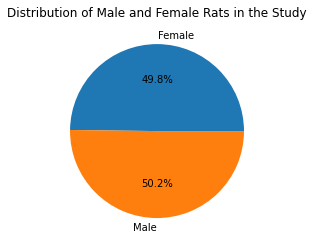

In [65]:
plt.pie(sex_df['Mouse ID'], labels=['Female', 'Male'], autopct="%1.1f%%")
plt.title("Distribution of Male and Female Rats in the Study")

In [48]:
#create a dataframe with only data from the four treatment groups of interest
subset_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') | (combined_df['Drug Regimen'] == "Ramicane") | (combined_df['Drug Regimen'] == 'Infubinol') | (combined_df['Drug Regimen'] == 'Ceftamin')]
#find the index of the max timepoint for each mouse id
max_indexes_df = subset_df.groupby('Mouse ID').idxmax(axis=1)

#double check the number of unique mouse id's in this treatment (should match the length of the final dataframe)
print(subset_df.nunique())

#create a list of the max timepoints
max_timepoint_index = max_indexes_df['Timepoint']
max_timepoint_index

#create a dataframe with the indexes of the max timepoints for each mouse
max_timepoint_df = combined_df.loc[max_timepoint_index, :]
max_timepoint_df.reset_index()

Mouse ID              100
Timepoint              10
Tumor Volume (mm3)    715
Metastatic Sites        5
Drug Regimen            4
Sex                     2
Age_months             23
Weight (g)             16
dtype: int64


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,907,a203,45,67.973419,2,Infubinol,Female,20,23
1,289,a251,45,65.525743,1,Infubinol,Female,21,25
2,1487,a275,45,62.999356,3,Ceftamin,Female,20,28
3,470,a411,45,38.407618,1,Ramicane,Male,3,22
4,480,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...,...
95,1374,y769,45,68.594745,4,Ceftamin,Female,6,27
96,1814,y793,45,31.896238,2,Capomulin,Male,17,17
97,1364,y865,45,64.729837,3,Ceftamin,Male,23,26
98,646,z578,45,30.638696,0,Ramicane,Male,11,16


In [64]:
infubinol_df = max_timepoint_df[max_timepoint_df['Drug Regimen']=='Infubinol']
infubinol_quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

inf_lowerq = infubinol_quartiles[.25]
inf_upperq = infubinol_quartiles[.75]
inf_median = infubinol_quartiles[.5]
inf_iqr = inf_upperq - inf_lowerq
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)

print(f"The lower quartile of tumor volume (mm3) in the Infubinol treatment group is {round(inf_lowerq,2)}")
print(f"The upper quartile of tumor volume (mm3) in the Infubinol treatment group is {round(inf_upperq, 2)}")
print(f"The median of tumor volume (mm3) in the Infubinol treatment group is {round(inf_median, 2)}")
print(f"The IQR of tumor volume (mm3) in the Infubinol treatment group is {round(inf_iqr, 2)}")

print(f"The Upper Bound of tumor volume (mm3) in the Infubinol treatment group is {round(inf_upper_bound, 2)}")
print(f"The Lower Bound of tumor volume (mm3) in the Infubinol treatment group is {round(inf_lower_bound, 2)}")
inf_outliers = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < inf_lower_bound) | (infubinol_df['Tumor Volume (mm3)'] > inf_upper_bound)]
print(inf_outliers)

The lower quartile of tumor volume (mm3) in the Infubinol treatment group is 54.05
The upper quartile of tumor volume (mm3) in the Infubinol treatment group is 65.53
The median of tumor volume (mm3) in the Infubinol treatment group is 60.17
The IQR of tumor volume (mm3) in the Infubinol treatment group is 11.48
The Upper Bound of tumor volume (mm3) in the Infubinol treatment group is 82.74
The Lower Bound of tumor volume (mm3) in the Infubinol treatment group is 36.83
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
214     c326          5           36.321346                 0    Infubinol   

        Sex  Age_months  Weight (g)  
214  Female          18          25  


In [50]:
capomulin_df = max_timepoint_df[max_timepoint_df['Drug Regimen']=='Capomulin']
capomulin_quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

cap_lowerq = capomulin_quartiles[.25]
cap_upperq = capomulin_quartiles[.75]
cap_median = capomulin_quartiles[.5]
cap_iqr = cap_upperq - cap_lowerq
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)

print(f"The lower quartile of tumor volume (mm3) in the Capomulin treatment group is {round(cap_lowerq,2)}")
print(f"The upper quartile of tumor volume (mm3) in the Capomulin treatment group is {round(cap_upperq, 2)}")
print(f"The median of tumor volume (mm3) in the Capomulin treatment group is {round(cap_median, 2)}")
print(f"The IQR of tumor volume (mm3) in the Capomulin treatment group is {round(cap_iqr, 2)}")

print(f"The Upper Bound of tumor volume (mm3) in the Capomulin treatment group is {round(cap_upper_bound, 2)}")
print(f"The Lower Bound of tumor volume (mm3) in the Capomulin treatment group is {round(cap_lower_bound, 2)}")
cap_outliers = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < cap_lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > cap_upper_bound)]
print(cap_outliers)

The lower quartile of tumor volume (mm3) in the Capomulin treatment group is 32.38
The upper quartile of tumor volume (mm3) in the Capomulin treatment group is 40.16
The median of tumor volume (mm3) in the Capomulin treatment group is 38.13
The IQR of tumor volume (mm3) in the Capomulin treatment group is 7.78
The Upper Bound of tumor volume (mm3) in the Capomulin treatment group is 51.83
The Lower Bound of tumor volume (mm3) in the Capomulin treatment group is 20.7
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [51]:
ramicane_df = max_timepoint_df[max_timepoint_df['Drug Regimen']=='Ramicane']
ramicane_quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

ram_lowerq = ramicane_quartiles[.25]
ram_upperq = ramicane_quartiles[.75]
ram_median = ramicane_quartiles[.5]
ram_iqr = ram_upperq - ram_lowerq
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)

print(f"The lower quartile of tumor volume (mm3) in the Ramicane treatment group is {round(ram_lowerq,2)}")
print(f"The upper quartile of tumor volume (mm3) in the Ramicane treatment group is {round(ram_upperq, 2)}")
print(f"The median of tumor volume (mm3) in the Ramicane treatment group is {round(ram_median, 2)}")
print(f"The IQR of tumor volume (mm3) in the Ramicane treatment group is {round(ram_iqr, 2)}")

print(f"The Upper Bound of tumor volume (mm3) in the Ramicane treatment group is {round(ram_upper_bound, 2)}")
print(f"The Lower Bound of tumor volume (mm3) in the Ramicane treatment group is {round(ram_lower_bound, 2)}")
ram_outliers = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < ram_lower_bound) | (ramicane_df['Tumor Volume (mm3)'] > ram_upper_bound)]
print(ram_outliers)

The lower quartile of tumor volume (mm3) in the Ramicane treatment group is 31.56
The upper quartile of tumor volume (mm3) in the Ramicane treatment group is 40.66
The median of tumor volume (mm3) in the Ramicane treatment group is 36.56
The IQR of tumor volume (mm3) in the Ramicane treatment group is 9.1
The Upper Bound of tumor volume (mm3) in the Ramicane treatment group is 54.31
The Lower Bound of tumor volume (mm3) in the Ramicane treatment group is 17.91
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [52]:
ceftamin_df = max_timepoint_df[max_timepoint_df['Drug Regimen']=='Ceftamin']
ceftamin_quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

ceft_lowerq = ceftamin_quartiles[.25]
ceft_upperq = ceftamin_quartiles[.75]
ceft_median = ceftamin_quartiles[.5]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)

print(f"The lower quartile of tumor volume (mm3) in the Ceftamin treatment group is {round(ceft_lowerq,2)}")
print(f"The upper quartile of tumor volume (mm3) in the Ceftamin treatment group is {round(ceft_upperq, 2)}")
print(f"The median of tumor volume (mm3) in the Ceftamin treatment group is {round(ceft_median, 2)}")
print(f"The IQR of tumor volume (mm3) in the Ceftamin treatment group is {round(ceft_iqr, 2)}")

print(f"The Upper Bound of tumor volume (mm3) in the Ceftamin treatment group is {round(ceft_upper_bound, 2)}")
print(f"The Lower Bound of tumor volume (mm3) in the Ceftamin treatment group is {round(ceft_lower_bound, 2)}")
ceft_outliers = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < ceft_lower_bound) | (ceftamin_df['Tumor Volume (mm3)'] > ceft_upper_bound)]
print(ceft_outliers)

The lower quartile of tumor volume (mm3) in the Ceftamin treatment group is 48.72
The upper quartile of tumor volume (mm3) in the Ceftamin treatment group is 64.3
The median of tumor volume (mm3) in the Ceftamin treatment group is 59.85
The IQR of tumor volume (mm3) in the Ceftamin treatment group is 15.58
The Upper Bound of tumor volume (mm3) in the Ceftamin treatment group is 87.67
The Lower Bound of tumor volume (mm3) in the Ceftamin treatment group is 25.36
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


Text(0.5, 0, 'Drug Treatment')

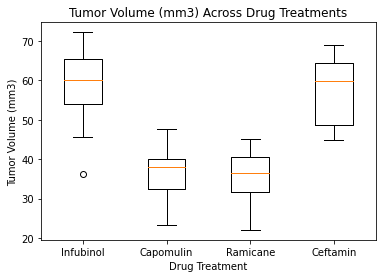

In [63]:
fig1, ax1 = plt.subplots()
ax1.boxplot([infubinol_df['Tumor Volume (mm3)'],capomulin_df['Tumor Volume (mm3)'], ramicane_df['Tumor Volume (mm3)'], ceftamin_df['Tumor Volume (mm3)']], labels=["Infubinol", "Capomulin", "Ramicane", "Ceftamin"])
ax1.set_title("Tumor Volume (mm3) Across Drug Treatments")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Treatment")

Text(0.5, 1.0, 'Mouse Y793 Tumor Volume Over Time While Being Treated With Capomulin')

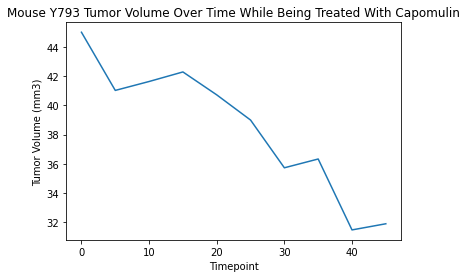

In [76]:
y793_df = combined_df.loc[combined_df['Mouse ID'] == 'y793']
y793_df
plt.plot(y793_df['Timepoint'], y793_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Y793 Tumor Volume Over Time While Being Treated With Capomulin')

Text(0, 0.5, 'Tumor Volume (mm3)')

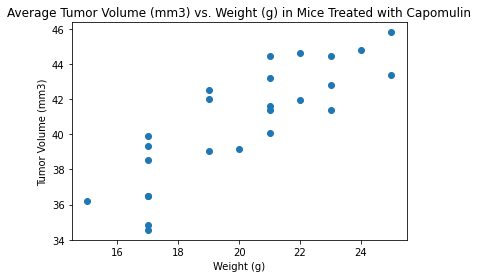

In [104]:
capomulin_df2 = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
capomulin_grouped_df = capomulin_df2.groupby('Mouse ID').mean()
capomulin_grouped_df
plt.scatter(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume (mm3) vs. Weight (g) in Mice Treated with Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

In [86]:
correlation = st.pearsonr(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
print(f'The correlation between tumor volume and weight in mice treated with Capomulin is {round(correlation[0], 2)}')

The correlation between tumor volume and weight in mice treated with Capomulin is 0.84


y = 0.95x + 21.55
The r-squared value is: 0.71


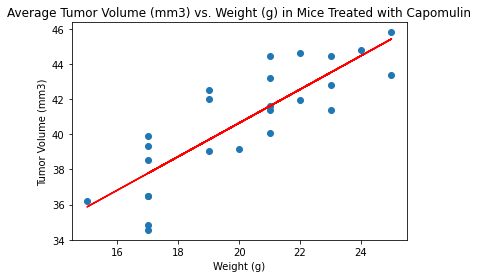

In [103]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
regress_values = capomulin_grouped_df['Weight (g)']*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
plt.plot(capomulin_grouped_df['Weight (g)'],regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Weight (g) in Mice Treated with Capomulin')
print(line_eq)
print(f'The r-squared value is: {round(rvalue**2,2)}')
plt.show()

# Conclusions
1. Capomulin and Ramicane seem to be more effective drug treatments compared to Ceftamin and Infubinol as mice in those treatment groups have lower median tumor volume in their final timepoint measurement. Between Capomulin and Ramicane, there does not appear to be a highly significant difference although the Ramicane treatment group does have a slightly lower median tumor volume at the final measurement.
2. In the Capomulin treatment, as can be observed in the scatterplot above, it is clear there is a strong correlation between weight and tumor volume. This could point to a potential limitation of the study, although more analysis would be required. If the weight's of mice are not equally varied across the treatment groups, this could inhibit the comparison of final tumor volume as the group with heavier mice would likely have larger tumors even if the treatment was equally effective.
3. The distribution of the sexes in this study is relatively equal. The results of this study can likely be generalized across sexes of mice due to equal distribution of sexes in this study. An additional area of future research would be to compare if there were any differences in efficacy in sex within treatment groups. 
